In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geojson-us-states/hurricane-florence.csv
/kaggle/input/geojson-us-states/hurricane-ike.csv
/kaggle/input/geojson-us-states/gz_2010_us_040_00_5m.json


In [2]:
import gdal

In [3]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

* Tutorial : https://www.datacamp.com/community/tutorials/geospatial-data-python
* Data : https://eric.clst.org/tech/usgeojson/


In [4]:
# https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json
country = geopandas.read_file("/kaggle/input/geojson-us-states/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [5]:
# country is a GeoDataFrame, which has all the regular characteristics of a Pandas DataFrame.

type(country)

geopandas.geodataframe.GeoDataFrame

In [6]:
# The data type of the column containing coordinates is GeoSeries
# Each value in the GeoSeries is a Shapely Object. It can be: Point, Line, Polygon, MultiPolygon
type(country.geometry)

geopandas.geoseries.GeoSeries

In [7]:
# In this case its 51 records that are either Polygon or Multipolygon.
# https://geopandas.org/reference.html#geoseries
country.geometry.geom_type.unique()

array(['MultiPolygon', 'Polygon'], dtype=object)

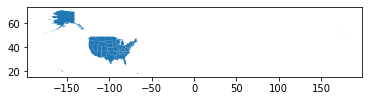

In [8]:
# A GeoDataFrame similar to a Pandas DataFrame has an attribute plot, that plots a map from the geometry character within the dataframe:
country.plot()

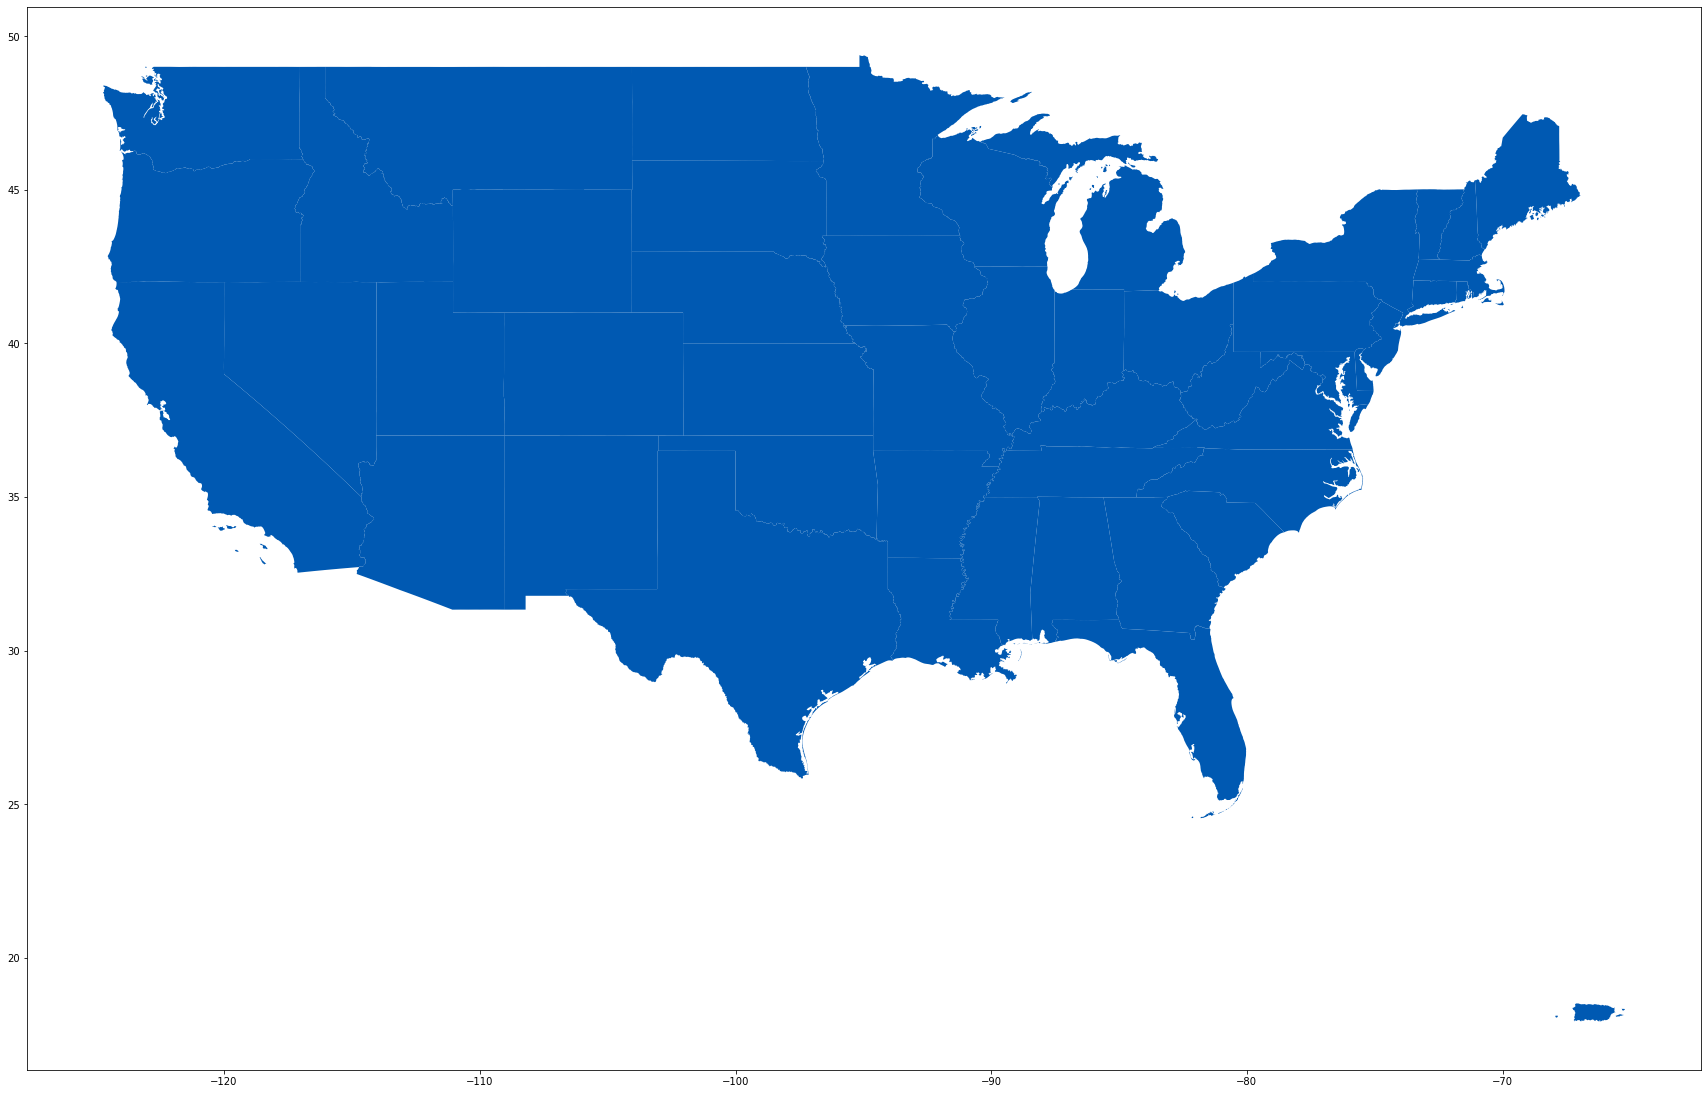

In [9]:
# Exclude Alaska and Hawaii since they are far from the relevant region and 
# make a plone with custom figure size and color
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#0059B2')

In [10]:
ike = pd.read_csv("/kaggle/input/geojson-us-states/hurricane-ike.csv")
florence = pd.read_csv("/kaggle/input/geojson-us-states/hurricane-florence.csv")

# Exploratory Data Analysis

* Checking the information, data type
* Any missing value
* Statistical data

In [11]:
ike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  91 non-null     object 
 1   Date            91 non-null     object 
 2   Lat             91 non-null     float64
 3   Long            91 non-null     float64
 4   Wind            91 non-null     int64  
 5   Pres            91 non-null     int64  
 6   Movement        91 non-null     object 
 7   Type            91 non-null     object 
 8   Name            91 non-null     object 
 9   Received        91 non-null     object 
 10  Forecaster      91 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.9+ KB


In [12]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


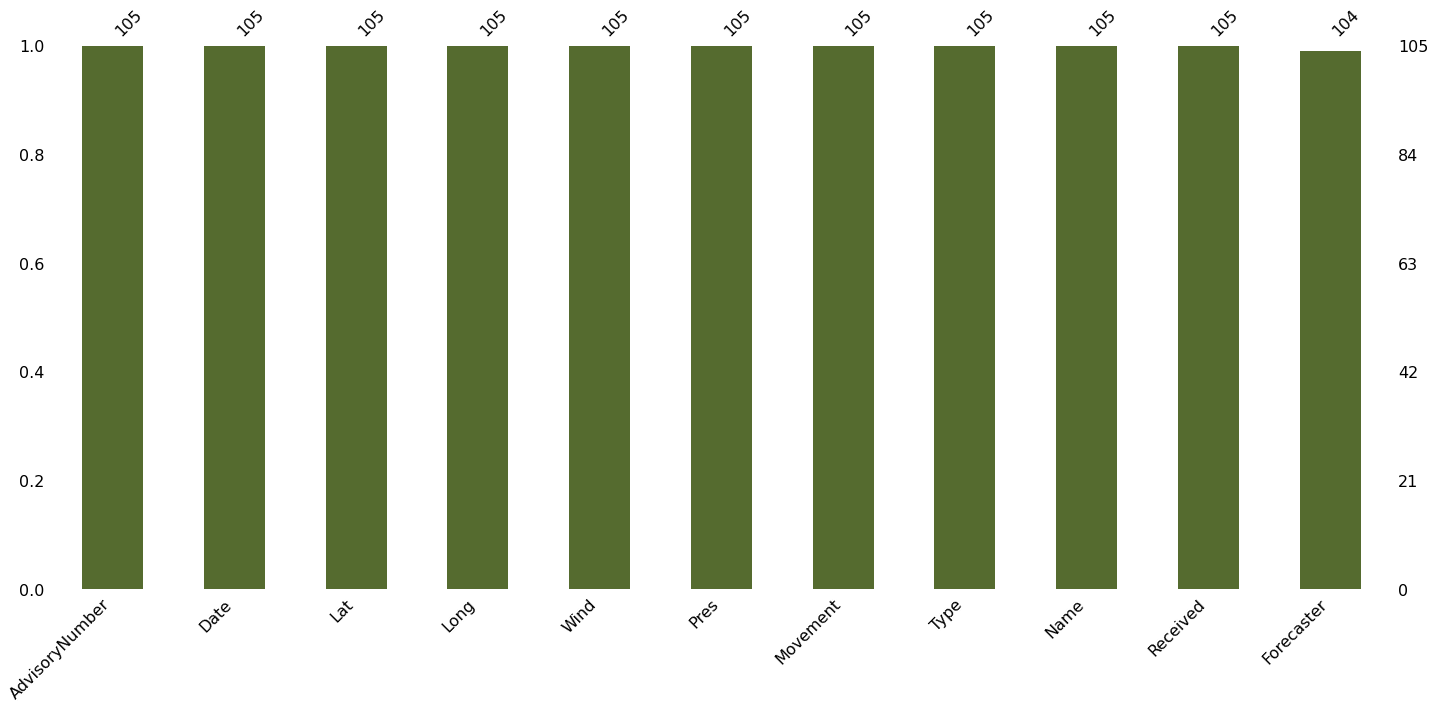

In [13]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

one missing value in the column "Forecaster" which you don't need for this tutorial

In [14]:
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [15]:
ike.describe()

,Lat,Long,Wind,Pres
count,91.000000,91.000000,91.000000,91.000000
mean,24.170330,77.028571,96.648352,961.527473
std,4.018001,15.832935,27.498030,16.336966
min,17.600000,39.500000,35.000000,935.000000
25%,21.300000,67.500000,80.000000,949.000000
50%,22.900000,81.500000,100.000000,958.000000
75%,26.250000,90.150000,115.000000,967.000000
max,36.400000,95.400000,145.000000,1005.000000


In [16]:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
ike = ike.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)

In [17]:
ike.head()


,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,09/01/2008 11:00,17.6,39.5,35,1005,WEST NEAR 16 MPH,Tropical Depression,NINE
1,09/01/2008 17:00,17.7,40.6,50,1000,WEST NEAR 16 MPH,Tropical Storm,Ike
2,09/01/2008 23:00,18.0,41.6,50,1000,WEST NEAR 14 MPH,Tropical Storm,Ike
3,09/02/2008 05:00,18.6,43.1,50,1005,WEST NEAR 15 MPH,Tropical Storm,Ike
4,09/02/2008 11:00,18.9,45.0,60,1002,WEST NEAR 18 MPH,Tropical Storm,Ike


### Here the longitude is west, need to add "-" in front of the number to correctly plot the data:

In [18]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
ike['Long'] = 0 - ike['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


### combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.

In [19]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
ike['coordinates'] = ike[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [20]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
ike['coordinates'] = ike['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [21]:
type(florence)

pandas.core.frame.DataFrame

In [22]:
type(florence['coordinates'])

pandas.core.series.Series

### Converting the data into geospatial data

In [23]:
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
ike = geopandas.GeoDataFrame(ike, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [24]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [25]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [26]:
florence.groupby("Name").Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [27]:
ike.groupby("Name").Type.count()

Name
IKE      2
Ike     88
NINE     1
Name: Type, dtype: int64

In [28]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.20000 13.40000)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.40000 13.60000)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.80000 13.70000)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.70000 13.70000)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.30000 13.80000)


In [29]:
print(f"Mean wind speed of Hurricane Florence is {round(florence.Wind.mean(),4)} mph and it can go up to {florence.Wind.max()} mph maximum")

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


In [30]:
print(f"Mean wind speed of Hurricane Ike is {round(ike.Wind.mean(),4)} mph and it can go up to {ike.Wind.max()} mph maximum")

Mean wind speed of Hurricane Ike is 96.6484 mph and it can go up to 145 mph maximum


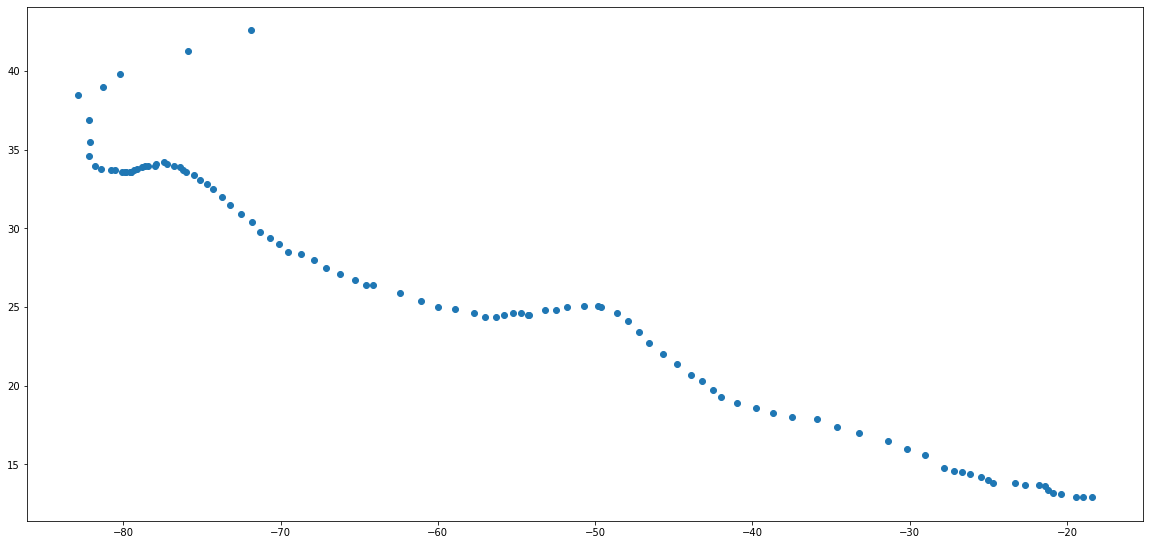

In [31]:
florence.plot(figsize=(20,10));

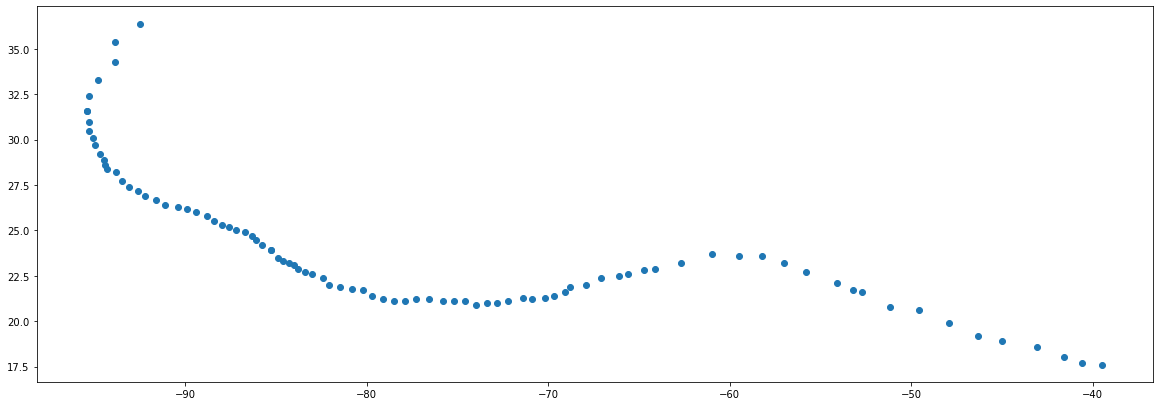

In [32]:
ike.plot(figsize=(20,10));

# Note
Because this dataframe only have coordinates information (location) of hurricane Florence at each time point, we can only plot the position on a blank map.

### Plotting the hurricane position on the US map to see where it hit and how strong it was at that time. 

* use the US map coordinates (data we loaded in the beginning) as the base and plotting hurricane Florence position on top of it.

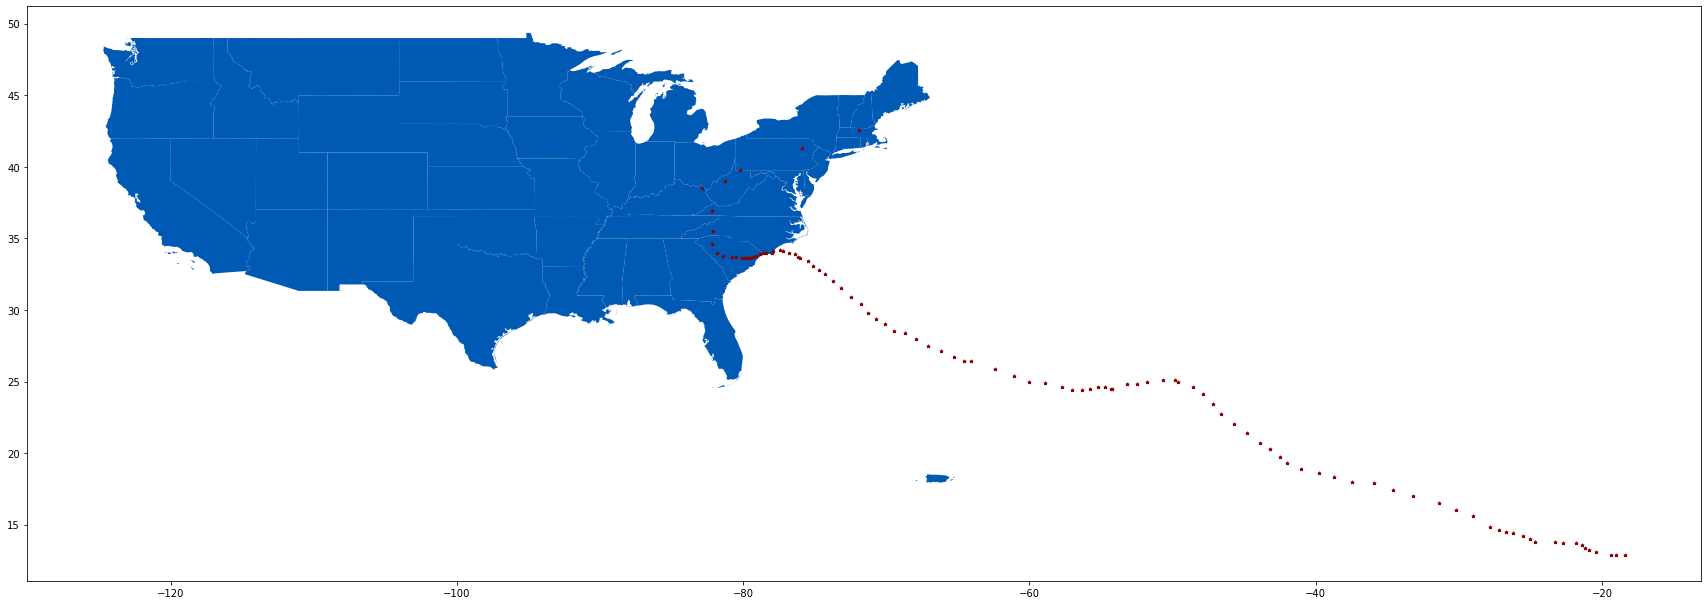

In [33]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

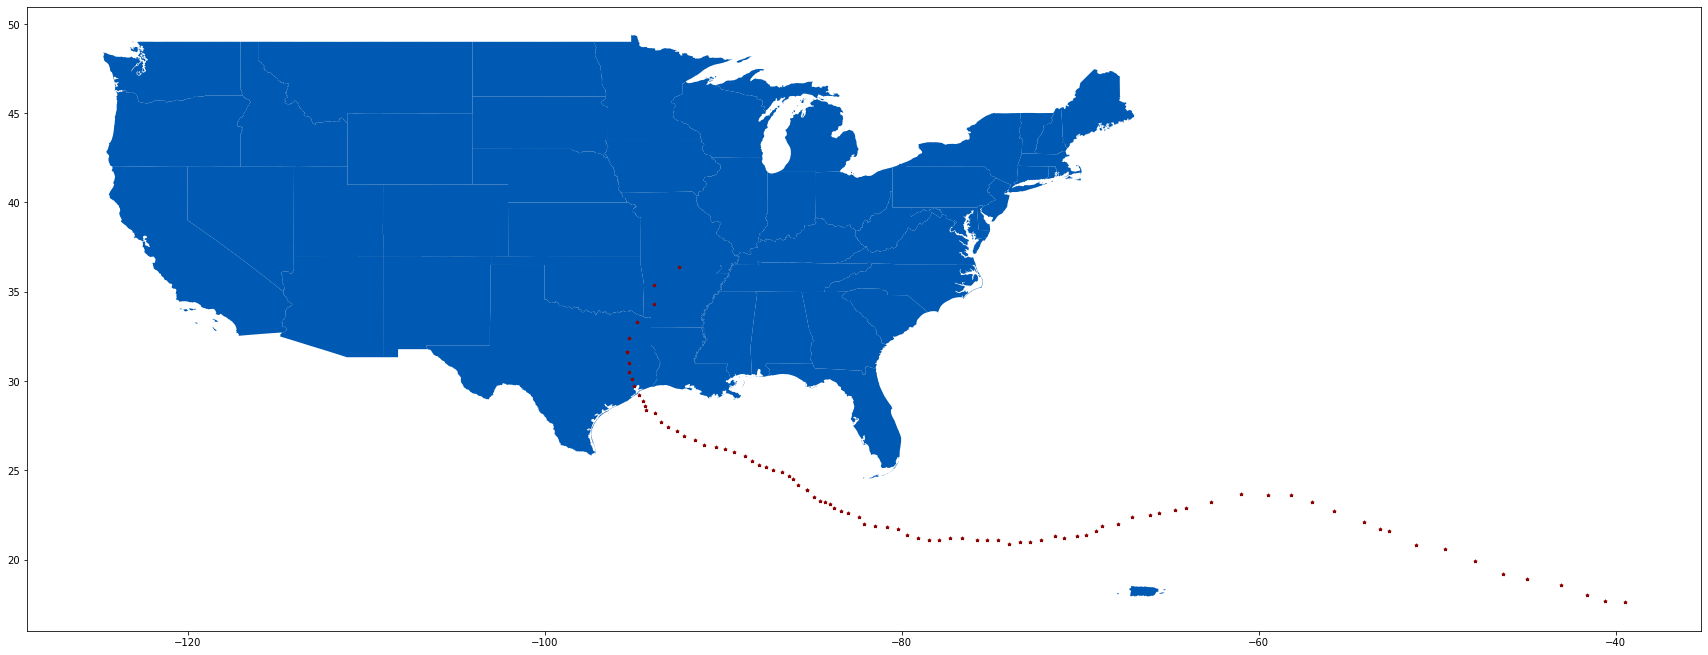

In [34]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
# plotting the hurricane position on top with red color to stand out:
ike.plot(ax=base, color='darkred', marker="*", markersize=10);

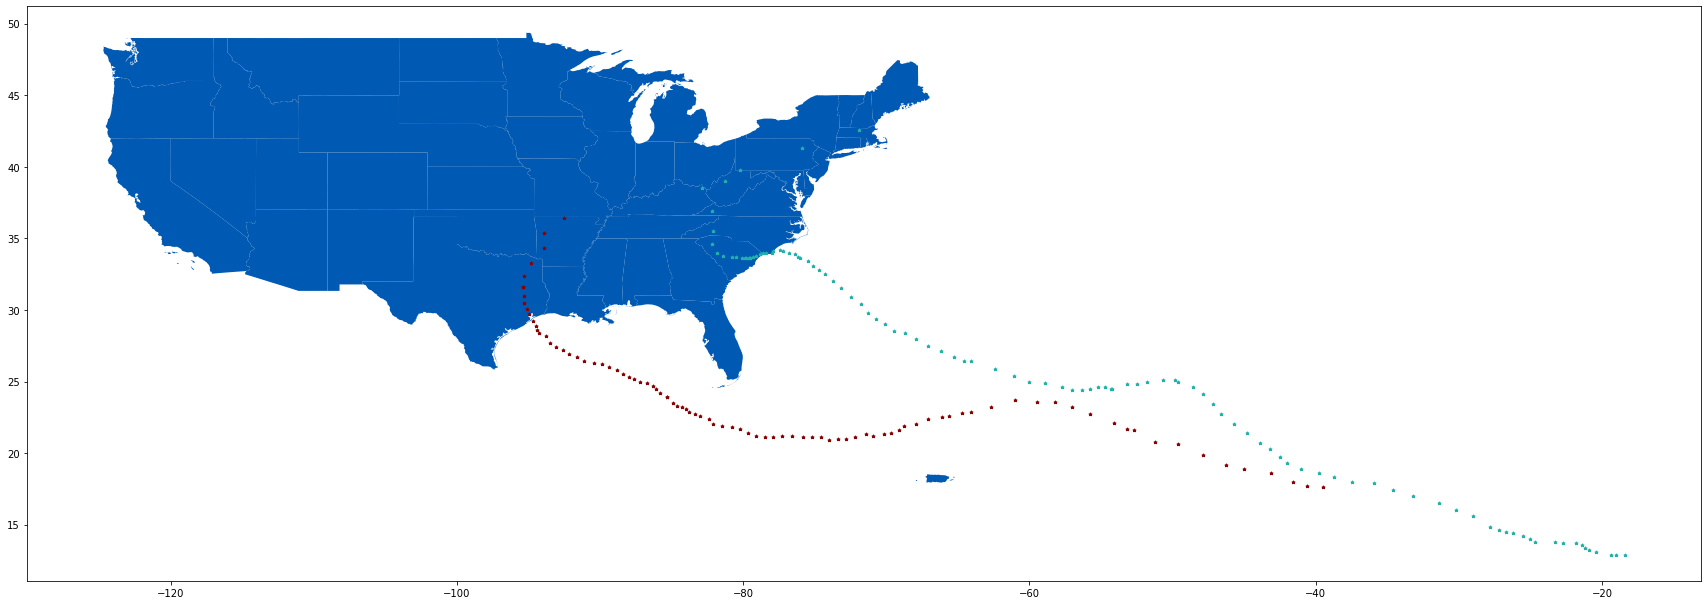

In [35]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
# plotting the hurricane position on top with red color to stand out:
# Matplotlib color names - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
ike.plot(ax=base, color='darkred', marker="*", markersize=10);
florence.plot(ax=base, color='lightseagreen', marker="*", markersize=10);
plt.savefig('ike_florence_usa.png',bbox_inches='tight');

### Add more details
* Adding title
* Color the hurricane position based on the wind speed to see how strong the hurricane was when it hit each city.
* Remove axis
* Add legend
* Saving the result to an image file to use later

Text(0.5, 1.0, 'Hurricane Florence in US Map')

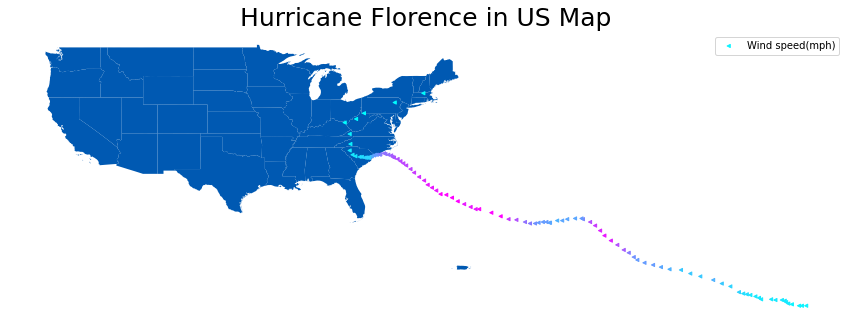

In [36]:
fig, ax = plt.subplots(1, figsize=(15,15))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
#plt.savefig('Hurricane_footage.png',bbox_inches='tight');

Text(0.5, 1.0, 'Hurricane Ike in US Map')

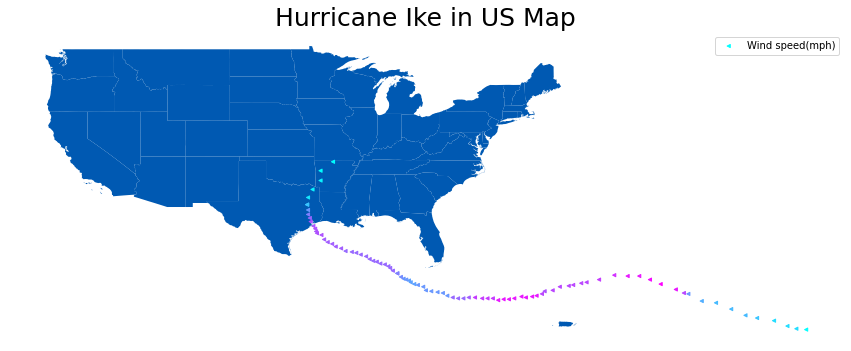

In [37]:
fig, ax = plt.subplots(1, figsize=(15,15))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
ike.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Ike in US Map", fontsize=25)
#plt.savefig('Hurricane_footage.png',bbox_inches='tight');

Text(0.5, 1.0, 'Hurricane Ike and Florence in US Map')

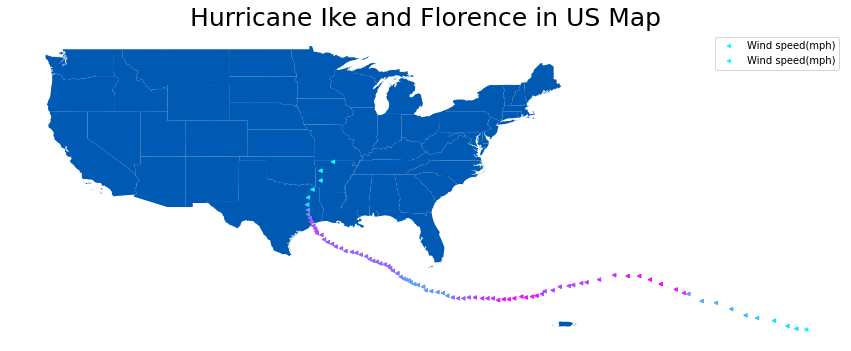

In [38]:
# XXX Can't plot both here. Why?
fig, ax = plt.subplots(1, figsize=(15,15))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#0059B2')
ike.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
ike.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Ike and Florence in US Map", fontsize=25)
#plt.savefig('Hurricane_footage.png',bbox_inches='tight');

# Resources for further studies
* For geo datasets http://flhurricane.com/cyclone/stormlist.php?year=2018
* For read http://file.allitebooks.com/20150811/Python%20Geospatial%20Development%20Essentials.pdf